In [3]:
import graphlab as gl
import datetime
import pandas as pd


In [8]:
df = pd.read_csv('data/BGValuesByUser.csv').drop(['Unnamed: 0'],axis=1)

In [9]:
import dateutil
from dateutil import parser

In [11]:
df =df.dropna()

In [12]:
df['user_id']= (df['user_id']).astype(int)

In [13]:
df.shape

(434292, 3)

In [14]:
df['value'] = (df['value']).astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434292 entries, 0 to 436022
Data columns (total 3 columns):
Date       434292 non-null object
value      434292 non-null int64
user_id    434292 non-null int64
dtypes: int64(2), object(1)
memory usage: 13.3+ MB


In [16]:
sf = gl.SFrame(df)

This non-commercial license of GraphLab Create for academic use is assigned to salmariazi@gmail.com and will expire on October 20, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1479410410.log


In [17]:
sf['Date'] = sf['Date'].apply(parser.parse)

In [18]:
time_series = gl.TimeSeries(sf, 'Date')


In [20]:
train, valid = gl.churn_predictor.random_split(time_series,
                              user_id='user_id', fraction=0.9)


In [21]:
churn_period = datetime.timedelta(days = 10)


In [22]:
model = gl.churn_predictor.create(train, user_id='user_id',
                      features = ['value'],
                      churn_period = churn_period)

PROGRESS: Grouping observation_data by user.
PROGRESS: Resampling grouped observation_data by time-period 1 day, 0:00:00.
PROGRESS: No time boundaries specified, computing 10 boundaries from 2016-05-01 00:00:00 to 2016-08-31 23:00:00
PROGRESS: Generating features at time-boundaries.
PROGRESS: --------------------------------------------------
PROGRESS: Features for 2016-05-13 00:06:00
PROGRESS: Features for 2016-05-25 07:12:00
PROGRESS: Features for 2016-06-06 14:18:00
PROGRESS: Features for 2016-06-18 21:24:00
PROGRESS: Features for 2016-07-01 04:30:00
PROGRESS: Features for 2016-07-13 11:36:00
PROGRESS: Features for 2016-07-25 18:42:00
PROGRESS: Features for 2016-08-07 01:48:00
PROGRESS: Features for 2016-08-19 08:54:00
PROGRESS: Training a classifier model.


Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 80166

Number of classes           : 2

Number of feature columns   : 10

Number of unpacked features : 100

+-----------+--------------+-------------------+-------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss |

+-----------+--------------+-------------------+-------------------+

| 1         | 0.190277     | 0.900731          | 0.512894          |

| 2         | 0.353915     | 0.902278          | 0.414043          |

| 3         | 0.605910     | 0.903388          | 0.353729          |

| 4         | 0.778213     | 0.904049          | 0.314829          |

| 5         | 0.939901     | 0.904498          | 0.289331          |

| 6         | 1.104637     | 0.904710          | 0.272141          |

| 10        | 1.824310     | 0.904648          | 0.243269          |

+-----------+--------------+-------------------+-------------------+

Decision tree regression:

--------------------------------------------------------

Number of examples          : 80166

Number of features          : 10

Number of unpacked features : 100

+-----------+--------------+--------------------+---------------+

| Iteration | Elapsed Time | Training-max_error | Training-rmse |

+-----------+--------------+--------------------+---------------+

| 1         | 0.275798     | 0.364091           | 0.283954      |

+-----------+--------------+--------------------+---------------+

PROGRESS: --------------------------------------------------
PROGRESS: Model training complete: Next steps
PROGRESS: --------------------------------------------------
PROGRESS: (1) Evaluate the model at various timestamps in the past:
PROGRESS:       metrics = model.evaluate(data, time_in_past)
PROGRESS: (2) Make a churn forecast for a timestamp in the future:
PROGRESS:       predictions = model.predict(data, time_in_future)


In [23]:
time_series['Date'].max()

datetime.datetime(2016, 8, 31, 23, 0)

In [24]:
predictions = model.predict(time_series)


PROGRESS: Making a churn forecast for the time window:
PROGRESS: --------------------------------------------------
PROGRESS:  Start : 2016-08-31 23:00:00
PROGRESS:  End   : 2016-09-10 23:00:00
PROGRESS: --------------------------------------------------
PROGRESS: Grouping dataset by user.
PROGRESS: Resampling grouped observation_data by time-period 1 day, 0:00:00.
PROGRESS: Generating features for boundary 2016-08-31 23:00:00.


In [25]:
evaluation_time = time_series['Date'].max()


In [26]:
predictions = model.predict(time_series, evaluation_time)


PROGRESS: Making a churn forecast for the time window:
PROGRESS: --------------------------------------------------
PROGRESS:  Start : 2016-08-31 23:00:00
PROGRESS:  End   : 2016-09-10 23:00:00
PROGRESS: --------------------------------------------------
PROGRESS: Grouping dataset by user.
PROGRESS: Resampling grouped observation_data by time-period 1 day, 0:00:00.
PROGRESS: Generating features for boundary 2016-08-31 23:00:00.


In [27]:
views = model.views.overview(time_series, evaluation_time)


PROGRESS: Making a churn forecast for the time window:
PROGRESS: --------------------------------------------------
PROGRESS:  Start : 2016-08-31 23:00:00
PROGRESS:  End   : 2016-09-10 23:00:00
PROGRESS: --------------------------------------------------
PROGRESS: Grouping dataset by user.
PROGRESS: Resampling grouped observation_data by time-period 1 day, 0:00:00.
PROGRESS: Generating features for boundary 2016-08-31 23:00:00.
PROGRESS: Making a churn forecast for the time window:
PROGRESS: --------------------------------------------------
PROGRESS:  Start : 2016-08-31 23:00:00
PROGRESS:  End   : 2016-09-10 23:00:00
PROGRESS: --------------------------------------------------
PROGRESS: Grouping dataset by user.
PROGRESS: Resampling grouped observation_data by time-period 1 day, 0:00:00.
PROGRESS: Generating features for boundary 2016-08-31 23:00:00.
PROGRESS: Making a churn forecast for the time window:
PROGRESS: --------------------------------------------------
PROGRESS:  Start : 2

ToolkitError: For this evaluation metric, the input SArray `predictions` can be of type float only when the number of classes is 2 (i.e binary classification). This dataset has 1 classes.


In [ ]:
views.show()

In [29]:
type(predictions)

graphlab.data_structures.sframe.SFrame

In [30]:
preds = predictions.to_dataframe()

In [31]:
type(preds)

pandas.core.frame.DataFrame

In [32]:
preds.head()

,user_id,probability
0,2,0.962137
1,3,0.964495
2,6,0.971008
3,8,0.362072
4,9,0.211783


In [35]:
import matplotlib.pyplot as plt

In [44]:
preds.probability.hist(bins=30)

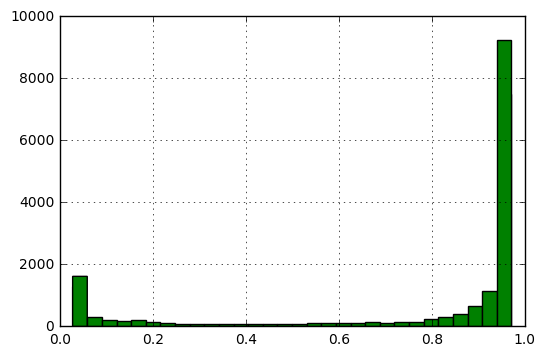

In [45]:
plt.show()